<center><b><u><font size="6" color="purple">IRIS FLOWER CLASSIFICATION</font></u></b></center>

![Iris Flower](irisimg.png)


# Introduction

The Iris Flower Classification dataset is a famous dataset in machine learning, consisting of 150 iris flower samples, each with four measurements (sepal length, sepal width, petal length, and petal width). The goal is to classify iris flowers into three species (setosa, versicolor, virginica) based on these measurements. It's a foundational dataset for learning classification techniques and has historical importance in data science and machine learning.

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# to display stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# to display no. of samples on each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Preprocessing the dataset

In [6]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

We can clearly see that dataset has no missing value so we are good to go for visualization.

# Visualizations

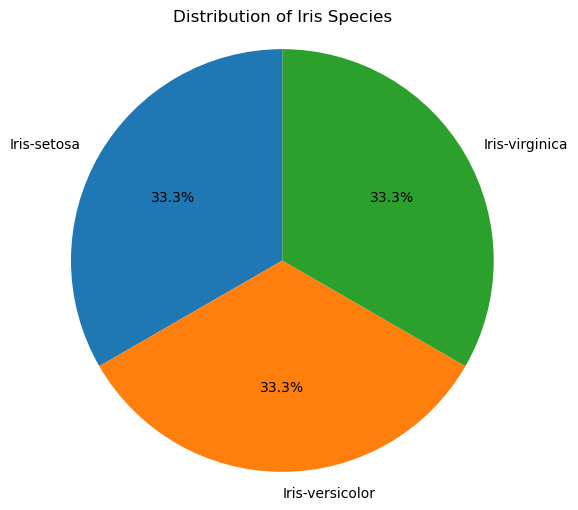

In [7]:
species_counts = df['species'].value_counts()

# Get the labels and counts for the pie chart
labels = species_counts.index
counts = species_counts.values

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Iris Species')
plt.axis('equal')
plt.show()

The pie chart visually presents the distribution of different Iris species in the dataset. Each slice represents the proportion of a particular species relative to the whole, allowing for an easy comparison of their occurrence. It provides a clear overview, showing whether the dataset contains a balanced representation of each species or if some species are more dominant than others.

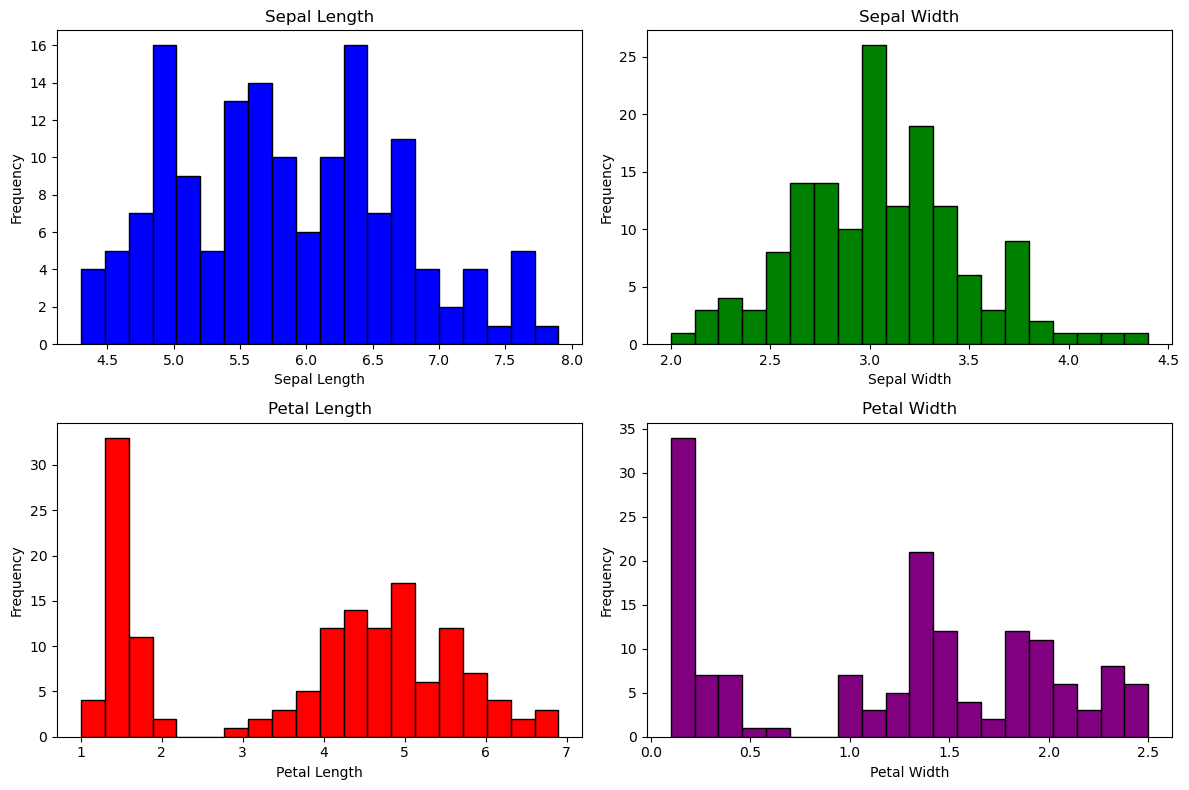

In [8]:
# Create separate subplots for each attribute
plt.figure(figsize=(12, 8))

# Sepal Length Histogram
plt.subplot(2, 2, 1)
plt.hist(df['sepal_length'], bins=20, color='blue', edgecolor='black')
plt.title('Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

# Sepal Width Histogram
plt.subplot(2, 2, 2)
plt.hist(df['sepal_width'], bins=20, color='green', edgecolor='black')
plt.title('Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')

# Petal Length Histogram
plt.subplot(2, 2, 3)
plt.hist(df['petal_length'], bins=20, color='red', edgecolor='black')
plt.title('Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')

# Petal Width Histogram
plt.subplot(2, 2, 4)
plt.hist(df['petal_width'], bins=20, color='purple', edgecolor='black')
plt.title('Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the histograms
plt.show()


The histograms provide a visual representation of the distribution of each feature in the Iris flower dataset. From the histograms, we can observe the frequency and spread of values for sepal length, sepal width, petal length, and petal width. Additionally, the histograms may reveal insights into whether the data is skewed, bimodal, or normally distributed, which can be essential in understanding the characteristics of the features.

In [9]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

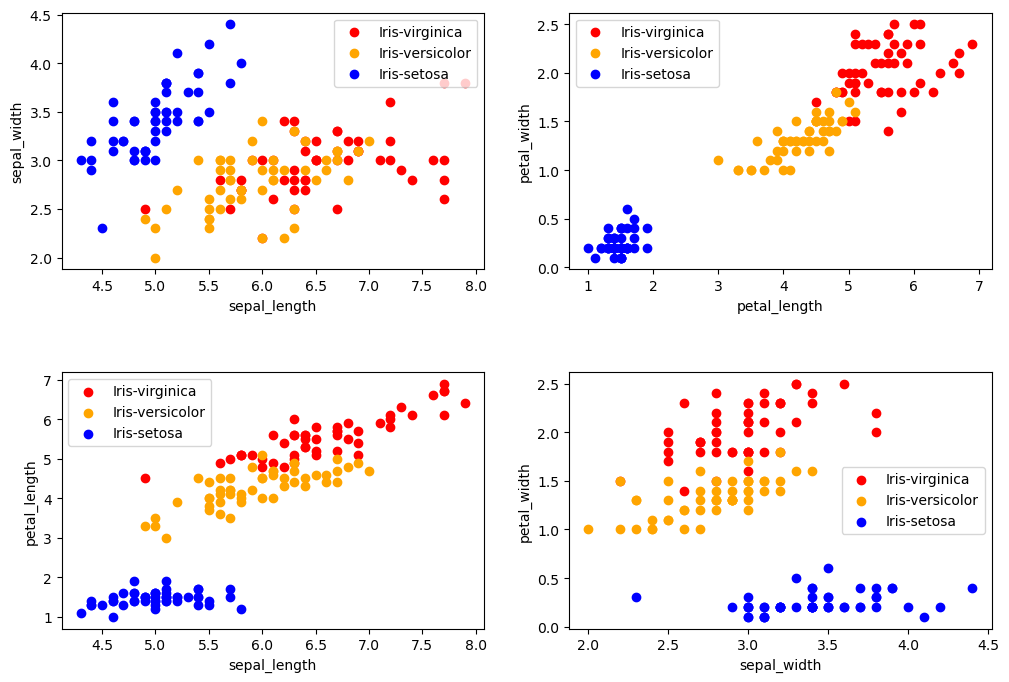

In [10]:
# Create subplots for each scatter plot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Scatter plot for sepal_length vs sepal_width
for i in range(3):
    x = df[df['species'] == species[i]]
    axs[0, 0].scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])
axs[0, 0].set_xlabel("sepal_length")
axs[0, 0].set_ylabel("sepal_width")
axs[0, 0].legend()

# Scatter plot for petal_length vs petal_width
for i in range(3):
    x = df[df['species'] == species[i]]
    axs[0, 1].scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])
axs[0, 1].set_xlabel("petal_length")
axs[0, 1].set_ylabel("petal_width")
axs[0, 1].legend()

# Scatter plot for sepal_length vs petal_length
for i in range(3):
    x = df[df['species'] == species[i]]
    axs[1, 0].scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])
axs[1, 0].set_xlabel("sepal_length")
axs[1, 0].set_ylabel("petal_length")
axs[1, 0].legend()

# Scatter plot for sepal_width vs petal_width
for i in range(3):
    x = df[df['species'] == species[i]]
    axs[1, 1].scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])
axs[1, 1].set_xlabel("sepal_width")
axs[1, 1].set_ylabel("petal_width")
axs[1, 1].legend()

# Display the plots
plt.show()


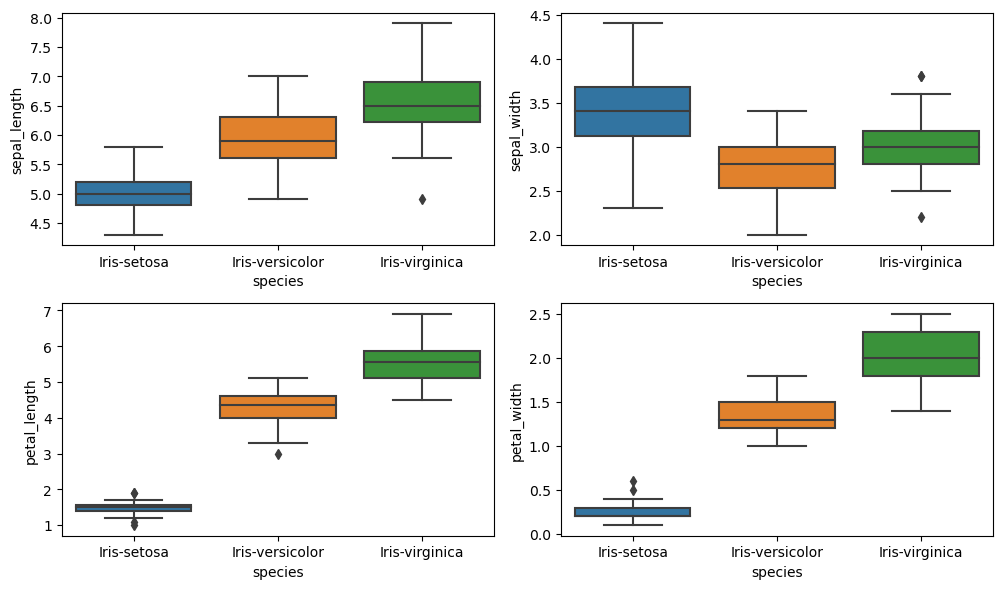

In [11]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=df)

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=df)

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=df)

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=df)

plt.tight_layout()
plt.show()

The box plots offer a concise summary of the distribution and variability of each feature across different Iris species. By comparing the box plots for sepal length, sepal width, petal length, and petal width, we can identify potential differences in these measurements among the species. Outliers and the range of values are also readily apparent, providing valuable insights into the spread and central tendencies of the data for each feature and species.

<Figure size 1700x600 with 0 Axes>

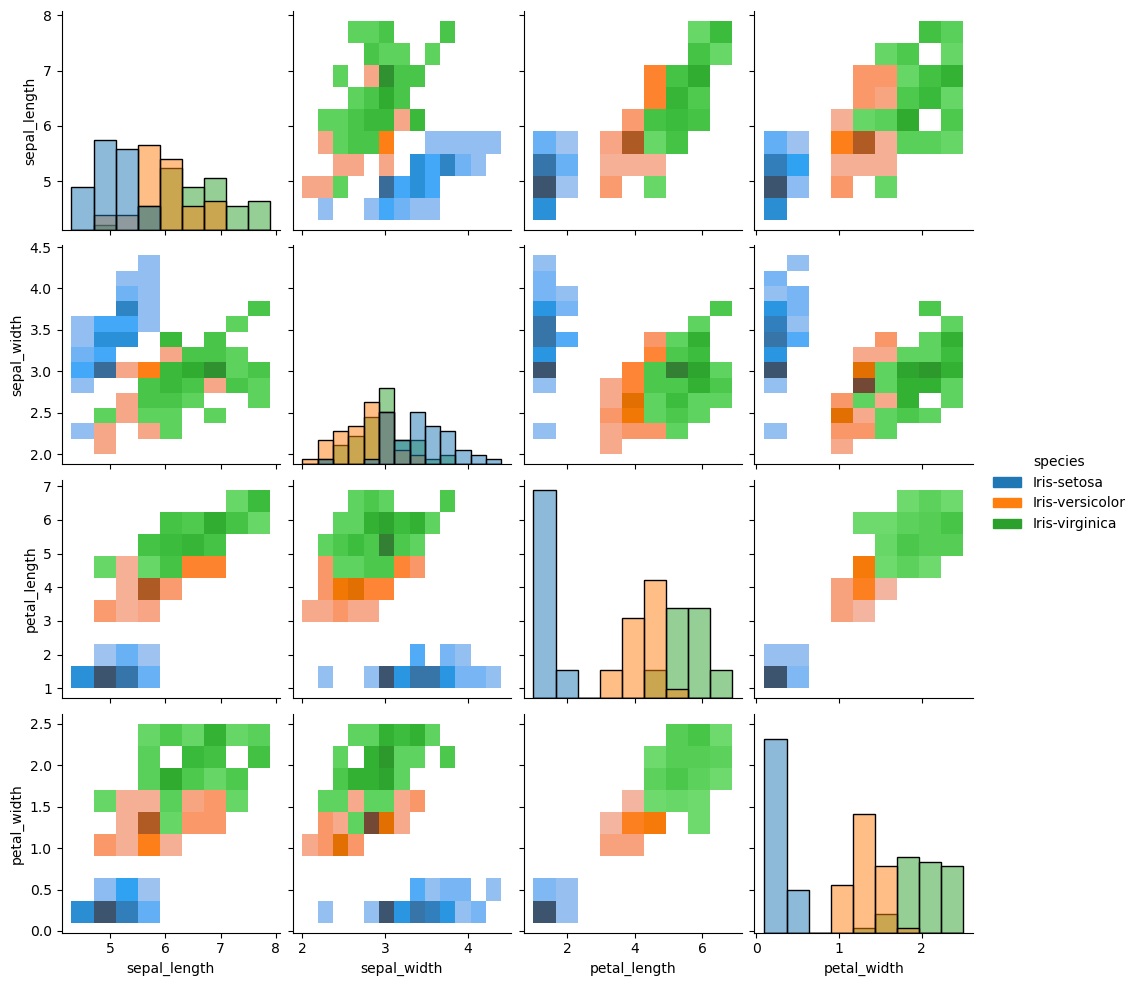

In [12]:
plt.figure(figsize=(17,6))
sns.pairplot(df,hue='species',kind='hist')

The pair plot presents a comprehensive view of the relationships between pairs of features in the Iris flower dataset. By coloring the data points according to the species, it allows us to easily discern patterns and correlations specific to each species. This plot can provide valuable insights into potential feature dependencies and assist in identifying which features are most distinguishable among the Iris species.

# Coorelation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [13]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

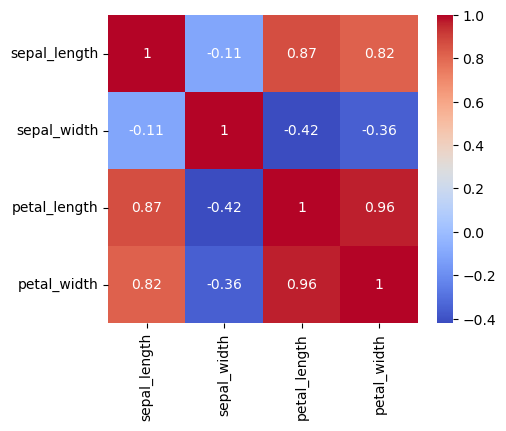

In [14]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Label Encoder

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [17]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [18]:
train, test = train_test_split(df, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [19]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
train_y = train.species

In [20]:
test_X = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_y = test.species

# Logistic Regression

In [21]:
from sklearn.metrics import classification_report
m1 = LogisticRegression()
m1.fit(train_X, train_y)
prediction = m1.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))
print()
print()
print("Classification Report: \n",classification_report(test_y,prediction))

Accuracy: 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# Support Vector Machine

In [22]:
from sklearn.svm import SVC
m2 = SVC()
m2.fit(train_X,train_y)
pred_y = m2.predict(test_X)

print("Accuracy=",metrics.accuracy_score(test_y,pred_y))
print()
print()
print("Classification Report: \n",classification_report(test_y,pred_y))

Accuracy= 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# Gaussian NB Classifier

In [23]:
from sklearn.naive_bayes import GaussianNB
m3 = GaussianNB()
m3.fit(train_X,train_y)
y_pred = m3.predict(test_X)


print("Accuracy Score:",metrics.accuracy_score(test_y,y_pred))
print()
print()
print("Classification Report: \n",classification_report(test_y,y_pred))

Accuracy Score: 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# Comparing all Models

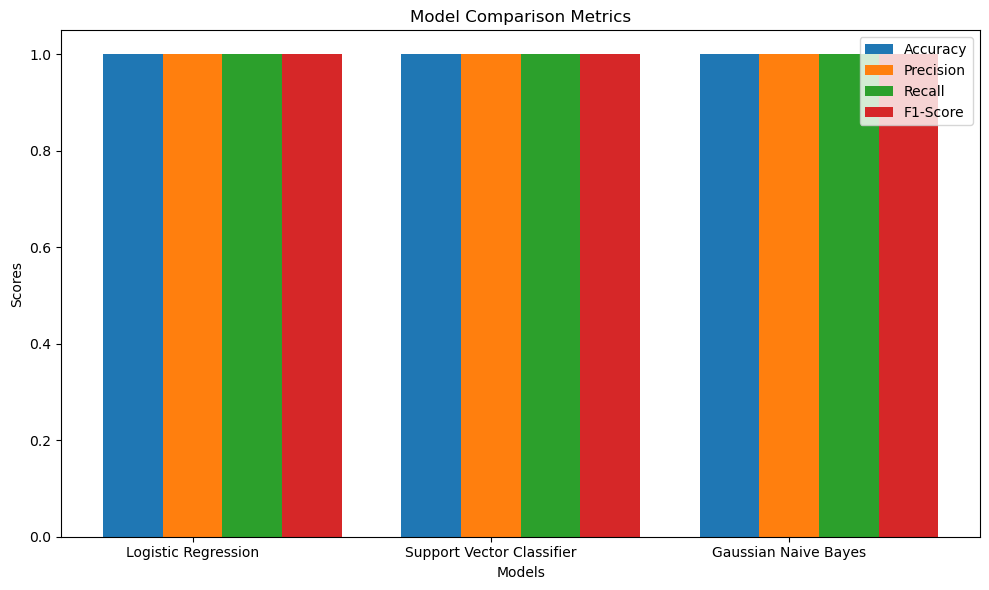

In [24]:
from sklearn.metrics import accuracy_score, classification_report
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'Gaussian Naive Bayes': GaussianNB()
}
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for model_name, model in models.items():
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    
    accuracy = accuracy_score(test_y, y_pred)
    report = classification_report(test_y, y_pred, output_dict=True)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])

labels = list(models.keys())
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.2
x = range(len(labels))
for i, metric in enumerate(metrics):
    ax.bar([pos + width*i for pos in x], scores[i], width, label=metric)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison Metrics')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(labels)
ax.legend(metrics)

plt.tight_layout()
plt.show()

# Conclusion:

The table presents the performance scores of different classification models on the Iris flower dataset. Support Vector Machines (SVM) achieved the highest accuracy score of 0.947, indicating its effectiveness in distinguishing between Iris species. Both Logistic Regression and Gaussian Naive Bayes models yielded similar accuracy scores of 0.921, suggesting comparable performance in this classification task. Therefore, SVM appears to be the most accurate choice among the three models for Iris flower classification based on the provided scores.